# MNIST - 필기체 숫자에 Convolution 연산

### 케라스 코드를 이용해서 MNIST 데이터셋 다운로드

In [1]:
from keras.datasets import mnist # THE MNIST DATABASE of handwritten 웹사이트에서 MNIST라는 DB 다운가능(케라스 코드 사용해서 쓸거임)
(x_train, y_train), (x_test, y_test) = mnist.load_data() # 6만개의 훈련용 데이터(이미지&라벨)가 x_train, y_train에 저장되고, 
                                                         # 1만개의 테스트용 데이터는 x_test, y_test에 저장됨!
# x_train : 60000 X 28 X 28의 배열 변수. 각 요소는 0~255의 값을 갖는 정수. i번째 이미지는 x_train[i,:,:]로 꺼낼 수 있음
# y_train : 길이가 60000인 1차원 배열 변수. 각 요소는 0~9의 정수. y[i] : 이미지 i에 대응하는 0~9사이의 값.

Using TensorFlow backend.


### 실제로 x_train에 저장된 처음 3개의 이미지 데이터 표시해보기!

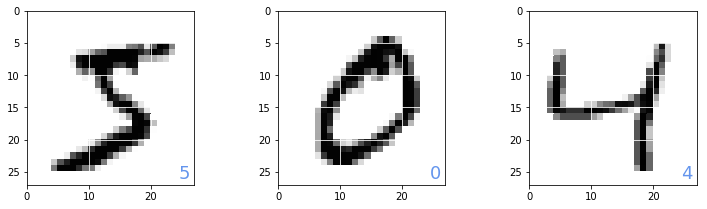

In [2]:
import numpy as np
import matplotlib.pyplot as plt # Python 라이브러리 중 하나로 그림이나 도형을 그려준다. 
                                 # 데이터 입력을 위해 numpy나 scipy와 같이 사용하며, MATLAB 대신 쓸 수도 있다.
# %matplotlib inline : notebook을 실행한 브라우저에서 바로 rich output(그림, 표, 소리, 영상 등)을 볼 수 있게 해주는 것!
%matplotlib inline 
plt.figure(1, figsize=(12,3.2)) # 새로운 figure를 생성. plt.figure(figure number, 가로x세로!!) => figsize() 단위 : 인치(inch)
plt.subplots_adjust(wspace=0.5) # 현재 배치되어있는 subplot들의 위치를 조정해줌. wspace(가로), hspace(세로)는 subplot들 사이의 간격
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1) # 1행 X 3열 (가로 한줄에 3개의 subplot), id+1=1부터 1,2,3번째 subplot 지정(하나의 figure에) **1번째부터 시작!!
    img = x_train[id,:,:] #id = 0번째부터 2번째 (총 3개 이미지 순서대로 가져오기)
    plt.pcolor(255-img) # pseudocolor로 표시하기 => 0을 흰색으로, 255를 검정으로 표현하기 위해서 255에서 반대로 빼주기!
    plt.text(24.5, 26, "%d"%y_train[id], color='cornflowerblue', fontsize=18) #  text(x축, y축, 문자열)=>좌표에 comment(text)를 추가.
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.grid('on',color='white')
plt.show()

# y_train(훈련집합의 y 변수에 들어있는 0~9 사이의 라벨값(클래스)들을 우측 하단에 text로 이미지와 함께 표시)
# 흰색을 0으로, 검정색을 255로 표현(pcolor(255-img)로 반대로 바꿔주었음)
# 참고로 이미지 크기 : 28X28. 따라서 plt.text의 좌표를 (24.5,26)로!
# 또한 각 그래프의 x,y 표시 범위를 0~27까지로!

# ***단위*** : figsize(w,h)는 실제 inch 단위(가로길이, 세로길이) / text(x,y), xlim(x,y), ylim(x,y) => 모두 길이가 아니라 축!!! 위치!!!

### 데이터를 사용하기 쉬운 형태로 변경하기

In [3]:
from keras.utils import np_utils # to_categorical() 함수 가져오기 위해서!

x_train = x_train.reshape(60000, 784) # (60000장의) 28 X 28의 이미지 데이터를 (60000장의) 784길이의 벡터로! 2차원 이미지를 1차원 벡터로!
x_train = x_train.astype('float32') # astype('형') : 배열의 형을 통째로 바꿀 때. 입력은 실수로 처리하고 싶으므로, int형을 float형으로 변환!
x_train = x_train / 255 # 각 값을 255로 나눠서 0~1사이의 실수값을 갖도록 변환.
num_classes = 10 # 0~9의 정수 부류 총 10개

print(np.shape(y_train)) # 출력해보면 원핫코드로 바꾸기 전에는 y_train : 60000 X 1 의 열벡터 (1차원)
print(y_train[0]) # 첫번째 이미지의 라벨은 5의 값을 갖고 있음.
y_train = np_utils.to_categorical(y_train, num_classes) # np.utils.to_categorical()라는 케라스 함수 : 1-of-K 부호화법으로 변경!
print(np.shape(y_train)) # 라벨값을 갖고 있던 y_train벡터를 각각 길이 10인 원핫코드로 바꿈으로써 차원이 하나 늘어남! (2차원으로)

x_test = x_test.reshape(10000,784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

# 1-of-K encoding(부호화법) : 원핫인코딩! => keras에서 제공하는 np_utils.to_categorial()함수 이용하면됨.
# ex. to_categorical([2, 5, 1, 6, 3, 7]) => 결과[[0. 0. 1. 0. 0. 0. 0. 0.] ... ] : 각각 원핫인코딩된 벡터들 모두 출력
# to_categorical(y_train, num_classes) : y_train(0~9사이의 라벨)을 categorical one-hot encoding으로 바꾸기!
# 이 블럭 계속 실행하다보면 y_train의 차원이 계속 하나씩 증가...

(60000,)
5
(60000, 10)


### 네트워크 모델(신경망) 정의

* 입력은 784차원의 열벡터
* 출력층은 10개의 뉴런(각 뉴런의 출력값이 확률을 나타내도록 하기 위해, 활성화함수로 softmax 사용. (10개 합하면 1)
* 입력층과 출력층 사이의 중간층은 16개의 노드로 구성. 중간층의 활성화함수로는 sigmoid 사용.

In [4]:
np.random.seed(1)
from keras.models import Sequential  # Sequential 모델은 레이어들을 선형으로(일렬로) 연결하여 구성
from keras.layers import Dense, Activation
from keras.optimizers import Adam

# 모델 구성하기
model = Sequential() # Sequential이라는 유형의 네트워크 모델(클래스)로 model이라는 '객체' 생성. 변수아님! => 이 model에 층 추가하기.
model.add(Dense(16, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) # metrics : 측정 수단(학습의 '정답률' 계산!)

# model.compile(loss, optimizer, metrics) => compile()함수의 3가지 인자
# loss(손실함수=오차함수=목적함수) / optimizer('adam'이나 'sgd'와 같은 최적화 알고리즘) / metrics(힉습을 모니터링하기 위한 측정 수단)

### 위에서 만든 모델로 학습시키기

In [5]:
import time # 시간을 계산하기 위한 파이썬 기본 모듈

startTime = time.time() # import한 time 모듈의 time()함수. 학습 시작 시간 계산.

# model.fit()으로 ***모델 학습***시키기. (모델 사용 전)
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))

# model.evaluate()으로 ***모델 평가***하기.
score = model.evaluate(x_test, y_test, verbose=0) # model.evaluate()의 shape : (2,). (2,1) 과 같음. 0번지엔 엔트로피오차, 1번지엔 정답률
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Computation time:{0:3f} sec'.format(time.time() - startTime))

# model.fit()의 인자들
# x_train, y_train : 훈련할 데이터를 지정
# epochs : 전체 데이터를 학습에 몇번(몇바퀴) 사용할건지.
# batch_size : 한 바퀴(1단계) 계산하는데에 몇개의 학습데이터를 사용할건지
# verbose : verbose=0이면 학습 진행 상황을 표시하지 않음, 1이면 매 시기의 학습 진행 상황을 표시함. (오차, 정밀도, 계산 시간)
# validation_data=(,) : test할 데이터 지정
# 따라서 history : 학습 과정의 정보가 들어있음!

# model.evaluate()의 인자들
# x_test, y_test : 테스트할 데이터 지정
# verbose=0 : 학습진행상황 표시x
# 따라서 score : score[0]엔 엔트로피오차, score[1]엔 정답률을 return함! (평가 결과)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 12us/step - loss: 2.0644 - acc: 0.2871 - val_loss: 1.7868 - val_acc: 0.4991
Epoch 2/10
60000/60000 [==============================] - 0s 7us/step - loss: 1.6059 - acc: 0.6509 - val_loss: 1.4375 - val_acc: 0.7671
Epoch 3/10
60000/60000 [==============================] - 0s 7us/step - loss: 1.3199 - acc: 0.7879 - val_loss: 1.1990 - val_acc: 0.8198
Epoch 4/10
60000/60000 [==============================] - 0s 7us/step - loss: 1.1139 - acc: 0.8245 - val_loss: 1.0199 - val_acc: 0.8445
Epoch 5/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.9553 - acc: 0.8435 - val_loss: 0.8803 - val_acc: 0.8583
Epoch 6/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.8317 - acc: 0.8586 - val_loss: 0.7726 - val_acc: 0.8707
Epoch 7/10
60000/60000 [==============

#### 1. Epoch이란? 

전체 sample 데이터를 이용하여 한 바퀴 돌며 학습하는 것을 1회 epoch이라 부른다.  
따라서 2 epochs은 전체 sample을 이용하여 두 바퀴를 돌며 학습한 것이다.


#### 2. Step이란?
Weight와 Bias를 1회 업데이트하는 것을 1 Step이라 부른다.


#### 3. Batch Size란?
1회 Step에서 사용한 데이터의 수이다.  
따라서 Batch Size가 100이라고 가정하고 Step이 5이면 약 500개의 데이터를 이용한 것이다.


따라서 아래와 같은 관계가 성립한다.  

### s = (n * e) / b

* n = num of sample : 전체 학습할 데이터의 개수
* e = epochs: Epoch 수
* b = batch size: 배치 사이